# Game Sales Analysis- Integrated Project 1

## Project discription:
This project was ordered by an online store Ice, which sells video games all over the world.
The purpose of the analysis is to advise the 2017 advertising campaigns as to potential big winners by identifying patterns that determine whether a game succeeds or not.

The data analyzed will be taken from available open sources that go back to 1980, and will include info regarding:
- Game name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)


***The hypotheses to be tested in this study are as followed:***
- Average user ratings of the Xbox One and PC platforms are different.
- Average user ratings for the Action and Sports genres are different.


## Table of Contets:
- 1  Project discription:
- 2  Table of Contets:
- 3  Loading data and libraries
    - 3.1  Initial exploration of data:
- 4  - Data Preprocessing
    - 4.1  Converting column names to lowercase:
    - 4.2  problematic data:
        - 4.2.1  # Working on "user score" values:
        - 4.2.2  # Converting data types
    - 4.3  checking for duplicates
    - 4.4  checking for missing values
- 5   preparing variables for analysis:
- 6   Analyzing data:
    - 6.1  - How many games were released in different years?
    - 6.2  - How did sales vary from platform to platform? :
    - 6.3  - Choose the platforms with the greatest total sales and build a distribution based on data for each year:
    - 6.4  - Find platforms that used to be popular but now have zero sales.
    - 6.5  Determine what period you should take data for. 
    - 6.6  - Which platforms are leading in sales? 
    - 6.7  - Box plots for the global sales of all games, broken down by platform.
    - 6.8  - How do user and professional reviews affect sales for one popular platform? 
    - 6.9  - General distribution of games by genre. 

- 7  User profile for each region
    - 7.1  The top five platforms. 
    - 7.2  The top five genres.
    - 7.3  Do ESRB ratings affect sales in individual regions?
- 8 Testing hypothses:
    - 8.1  A comparison between XBOX and PC platforms
    - 8.2.  H0: A comparison between action and sports genres
- 9  General conclusions:
    

## Loading data and libraries

In [1]:
# Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import stats as st
import seaborn as sns
import math 
import re 


In [2]:
# Upload data:
try:
    data = pd.read_csv(r"C:\Users\USER\OneDrive\מסמכים\DATA ANALYST\Practicum100\Integrated project1\games-Integrated Project.csv")
    
except:
    data = pd.read_csv('/datasets/games.csv')
   

### Initial exploration of data:

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#checking if the name and genre missing values appear in the same rows. 
data[data['Name'].isnull()]

#(yes they do, and do not bare too much info, so i'll drop them.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [5]:
data = data.drop([data.index[659], data.index[14244]])

In [6]:
data.isnull().sum()/len(data)

Name               0.000000
Platform           0.000000
Year_of_Release    0.016095
Genre              0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513133
User_Score         0.400826
Rating             0.404715
dtype: float64

In [7]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16713,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16444,NaN,NaN,NaN,2006.49,5.87553,1980,2003,2007,2010,2016
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16713,NaN,NaN,NaN,0.263302,0.813565,0,0,0.08,0.24,41.36
EU_sales,16713,NaN,NaN,NaN,0.145045,0.503359,0,0,0.02,0.11,28.96
JP_sales,16713,NaN,NaN,NaN,0.0776246,0.308871,0,0,0,0.04,10.22
Other_sales,16713,NaN,NaN,NaN,0.0473428,0.186742,0,0,0.01,0.03,10.57
Critic_Score,8137,NaN,NaN,NaN,68.9677,13.9382,13,60,71,79,98
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


***Genral remarks on dataset:***
- Size: 16715 rows and 11 columns
- Data types: 'user_score' should be float: 'tbd' messed it up- need to find a solution.
  'critic_score' is a whole numbers and dtype can be changed to 'int. However, with the amount of missing values, i prefer to
  leave the dtype as it is just incase..
- All column names, as all string values, start with a capital letter.
- Missing values: appear in 6 variables. Name and Genre missing values are related to the same rows and were dropped.
- Some names include the year.
- Categorical Variables:  11559 game names, 31 plattforms, 12 genres, 8 Rating levels.
- Some games have almost zero sales.
- In all regions the minimum sale is $0.
- Sales in North America are by far larger than any other region
- year of release 1980-2016

## 1- Data Preprocessing


#### Converting column names to lowercase:

In [10]:
data.columns = data.columns.str.lower()
data.head(2)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


### problematic data:
####  # Working on "user score" values:

In [11]:
# tbd appears in almost 15% of the data, and hence cannot be dropped.
data['user_score'].value_counts()/len(data['user_score'])

tbd    0.145037
7.8    0.019386
8      0.017352
8.2    0.016873
8.3    0.015198
         ...   
1.9    0.000120
9.6    0.000120
1.5    0.000120
0      0.000060
9.7    0.000060
Name: user_score, Length: 96, dtype: float64

In [12]:
# My hypothesis was that relativly new games would be to blame for the 'tbd's, but i was wrong.
# They appear in a wide range of release years, so I assume that the user-score data is not up to date.

data[data['user_score'] == "tbd"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [13]:
# A second check- there are no data rows in which year of release is 2016 and user score is tbd. Hence, this must be an error.

tbds = data[data['user_score'] == "tbd"]
tbds[tbds['year_of_release'] == "2016"]

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [14]:
# Since there is no way of knowing what the user_sore could have been, I choose to turn the tbd's to a missing value(nan).
# I chose having nans over 'unknown', so i can convert the dtype to float.
# But first, I'll check for any other unique values: 

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
# Changing to nan and checking if it worked

data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

####  # Converting data types

In [16]:
# user score to float:
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


### checking for duplicates

In [17]:
# None were found:

data.duplicated().sum()

0

### checking for missing values

In [18]:
# How many missing?
data.isnull().sum()/len(data)

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.545863
rating             0.404715
dtype: float64

### # year_of_release: 

In [19]:
# Subsetting to rows in which year of release is null
year_null = data[data['year_of_release'].isnull()]
year_null

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [20]:
# subsetting from a subset to locate all rows in which the year appears in the name. 
# (about 20 rows.. Is it worth the trouble..?)
year_null_name = year_null[year_null['name'].str.contains("20") | year_null['name'].str.contains("9")]
year_null_name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1301,Triple Play 99,PS,NaN,Sports,0.81,0.55,0.00,0.10,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,NaN,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E


In [21]:
#missing values in this var are only 1.6% of data. I decide to not include it in the data.
data = data.dropna(subset=['year_of_release'])
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [22]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


####  # Filling score and rating variables seems impossible... There is no way i can guess them based on other parameters. So, I decided to let them be, and when the time comes to use them- to create subsets without the missing values.

In [23]:
# I want to still look into the most popular game, and see if the rating or user/critic scores appears on a different platform:
need_4_speed = data[data['name'] == 'Need for Speed: Most Wanted']
need_4_speed[['platform', 'year_of_release', 'rating', 'user_score', 'critic_score']].sort_values(by='year_of_release', ascending=True)
# It seems that rating and score may change dramatically even for the same game and year, across platforms.
# Hence, I decide to leave the 'nan' values, and subset the data according to what i need, as i go..

,platform,year_of_release,rating,user_score,critic_score
253,PS2,2005.0,T,9.1,82.0
1591,X360,2005.0,T,8.5,83.0
1998,XB,2005.0,T,8.8,83.0
3581,GC,2005.0,T,9.1,80.0
5972,PC,2005.0,T,8.5,82.0
6410,DS,2005.0,E,6.1,45.0
6473,GBA,2005.0,E,8.3,NaN
523,PS3,2012.0,NaN,NaN,NaN
1190,X360,2012.0,T,8.5,83.0
2048,PSV,2012.0,NaN,NaN,NaN


## 2- preparing variables for analysis:
Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.


In [24]:
data['sum_of_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.sample(7)   

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
389,Grand Theft Auto 2,PS,1998.0,Action,1.13,2.07,0.00,0.22,70.0,8.0,T,3.42
15080,Sheep,PS,2000.0,Strategy,0.01,0.01,0.00,0.00,71.0,NaN,E,0.02
8032,Fear Effect 2: Retro Helix,PS,2001.0,Action,0.10,0.07,0.00,0.01,84.0,8.9,M,0.18
710,Onimusha 2: Samurai's Destiny,PS2,2002.0,Adventure,0.62,0.44,1.06,0.13,84.0,9.0,M,2.25
346,SOCOM: U.S. Navy SEALs,PS2,2002.0,Shooter,2.53,0.81,0.06,0.24,82.0,7.9,M,3.64
357,Battlefield 4,PS4,2013.0,Shooter,1.35,1.55,0.17,0.51,85.0,6.9,M,3.58
4946,Samurai Warriors Chronicles,3DS,2011.0,Action,0.12,0.05,0.20,0.01,61.0,7.7,T,0.38


## 3- Analyzing data:



### -  How many games were released in different years?

In [25]:
#["Is the data for every period significant?" - I am not sure what "significant" means in this field, 
# but before 1994 there were under 100 games a year]
games_per_year = data.pivot_table(index= 'year_of_release', values='name', aggfunc='count').reset_index()
games_per_year

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


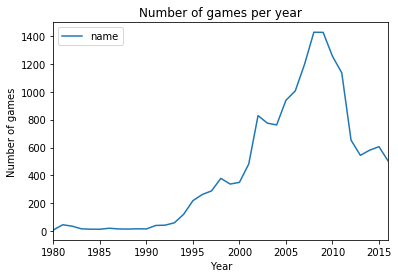

In [26]:
games_per_year.plot('year_of_release', 'name')
plt.title('Number of games per year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()


***Short sum***  : In general, as can be seen in the plot, the growth of the number of games released each year, between 1980 and 2016, builds up in "waves" or "peaks", and does not advance linearly. It seems like in years where the growth is very fast (as can be seen in steep slopes in the graph), in the next years the market "corrects" itself and there is a fall in new game released. Maybe it says something about a ceiling effect.  Despite these "correction", the general trend between 1980 and 2008 was a positive one. From this year on, though, there is a general fall in the number of games that come out to the market. Right now, 2016 has the lowest number of released games since 2001.

### - How did sales vary from platform to platform? :

In [27]:
sales_per_plat= data.pivot_table(index= 'platform', values='sum_of_sales', aggfunc='sum').reset_index().sort_values(by='sum_of_sales', ascending = False)
sales_per_plat

,platform,sum_of_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


In [28]:
# adding a z-score column to later plot the leading platforms compared to mean sales:
sales_per_plat['z_sales'] = (sales_per_plat['sum_of_sales'] - sales_per_plat['sum_of_sales'].mean())/ sales_per_plat['sum_of_sales'].std()
sales_per_plat

,platform,sum_of_sales,z_sales
16,PS2,1233.56,2.759744
28,X360,961.24,1.968011
17,PS3,931.34,1.881081
26,Wii,891.18,1.764321
4,DS,802.78,1.507310
15,PS,727.58,1.288676
18,PS4,314.14,0.086655
6,GBA,312.88,0.082992
19,PSP,289.53,0.015105
2,3DS,257.81,-0.077116


In [29]:
sales_per_plat['color'] = ['red' if z < 0 else 'green' for z in sales_per_plat['z_sales']]
sales_per_plat


,platform,sum_of_sales,z_sales,color
16,PS2,1233.56,2.759744,green
28,X360,961.24,1.968011,green
17,PS3,931.34,1.881081,green
26,Wii,891.18,1.764321,green
4,DS,802.78,1.507310,green
15,PS,727.58,1.288676,green
18,PS4,314.14,0.086655,green
6,GBA,312.88,0.082992,green
19,PSP,289.53,0.015105,green
2,3DS,257.81,-0.077116,red


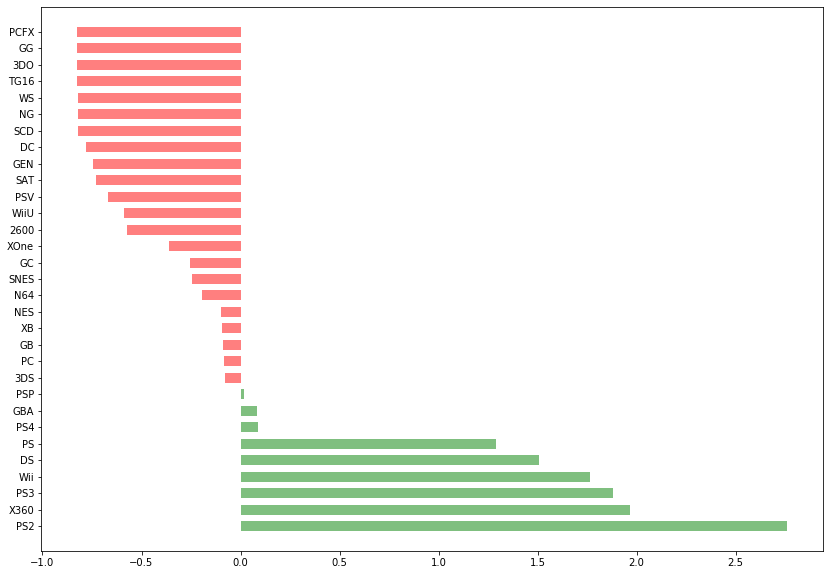

In [30]:
plt.figure(figsize = (14,10))
plt.hlines(y=sales_per_plat.platform, xmax=sales_per_plat.z_sales, xmin=0, color=sales_per_plat.color, alpha=0.5, linewidth=10);

In [31]:
# A table of sales per year for PS2 - the leading platform in sales
data.query('platform == "PS2"').groupby('year_of_release')['sum_of_sales'].agg('sum').reset_index()


,year_of_release,sum_of_sales
0,2000.0,39.17
1,2001.0,166.43
2,2002.0,205.38
3,2003.0,184.31
4,2004.0,211.81
5,2005.0,160.66
6,2006.0,103.42
7,2007.0,75.99
8,2008.0,53.90
9,2009.0,26.40


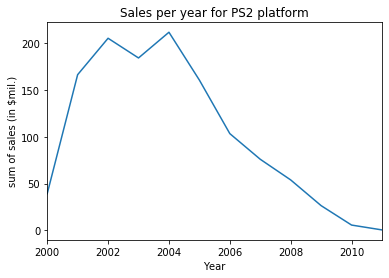

In [32]:
# A line plot based on the table:
data.query('platform == "PS2"').groupby('year_of_release')['sum_of_sales'].agg('sum').plot();
plt.title('Sales per year for PS2 platform')
plt.xlabel('Year')
plt.ylabel('sum of sales (in $mil.)')
plt.show()

***Short explanation:*** 
As can be seen, the platforms vary significantly in their total number of sales, ranging between $1233.56 mil. and $0.03 mil.
This diverging bar plot shows the divergence of sales across platforms. As can be seen, the sum of sales of the majority of platforms is slightly below average (up to 1 std.).
Five out of 9 platforms whose sales rise above average, however, earn a lot above average (1.5 std and more).
 
 Looking into the highest earning platform(PS2), we can see a very high rise in its first couple of years, a general ability to maintain its peak sales through out 2 years (2002-2004), and from 2004- a gradual fall in revenue until reaching almost 0 by 2011. It raises questions whether this is the general trend/picture for all platforms.

###  - Choose the platforms with the greatest total sales and build a distribution based on data for each year:

In [33]:
greatest_selling = sales_per_plat[sales_per_plat['color'] == 'green']['platform'].tolist()
greatest_selling 

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP']

In [34]:
#data['leading'] = data['platform'].apply(lambda x: any([k in x for k in greatest_selling]))
data_leading=data[data['platform'].isin(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP'])][['platform', 'year_of_release', 'sum_of_sales']]
data_leading

,platform,year_of_release,sum_of_sales
0,Wii,2006.0,82.54
2,Wii,2008.0,35.52
3,Wii,2009.0,32.77
6,DS,2006.0,29.80
7,Wii,2006.0,28.91
...,...,...,...
16708,GBA,2002.0,0.01
16709,PS2,2008.0,0.00
16710,PS3,2016.0,0.01
16711,X360,2006.0,0.01


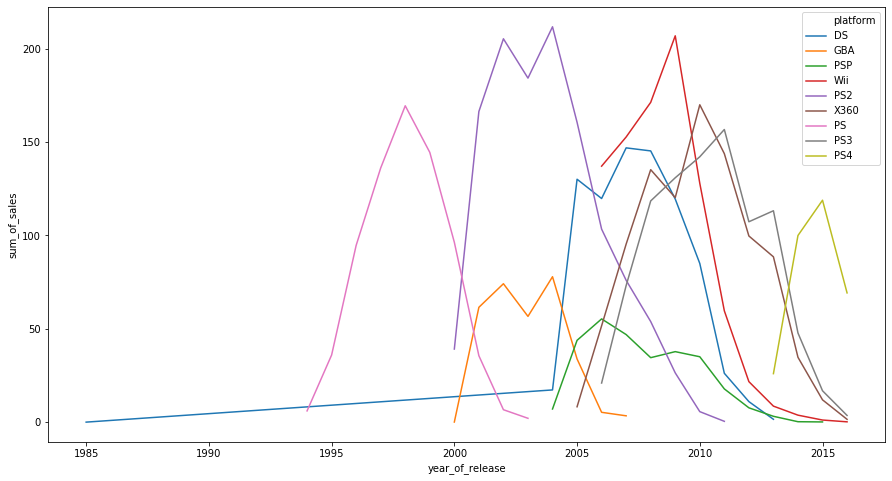

In [35]:
# ploting the life cycle of the leading platforms (in terms of sales):
plot=data_leading.groupby(['platform', 'year_of_release'])['sum_of_sales'].sum().reset_index().sort_values(by='sum_of_sales')
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=plot, x='year_of_release', y='sum_of_sales', hue='platform')

***The plot shows the distribution of sum of sales per platform by year of release. Except for PS4 they have all reached nearly zero sales before 2016. (This answers the next request as well ("Find platforms.." etc.)

###  - Find platforms that used to be popular but now have zero sales.

In [36]:
# searching for min values in sales column:
n_data = data.groupby(['platform', 'year_of_release'])['sum_of_sales'].sum().reset_index().sort_values(by='sum_of_sales')
n_data 


,platform,year_of_release,sum_of_sales
23,DC,2007.0,0.02
10,3DO,1994.0,0.02
25,DS,1985.0,0.02
94,PC,1988.0,0.03
119,PCFX,1996.0,0.03
...,...,...,...
199,Wii,2008.0,171.32
133,PS2,2003.0,184.31
132,PS2,2002.0,205.38
200,Wii,2009.0,206.97


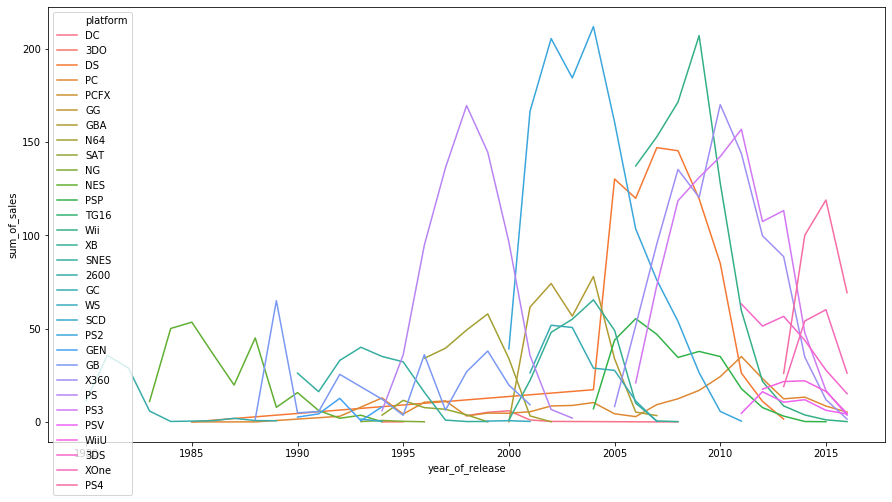

In [37]:
# plotting all platforms:
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=n_data, x='year_of_release', y='sum_of_sales', hue='platform')

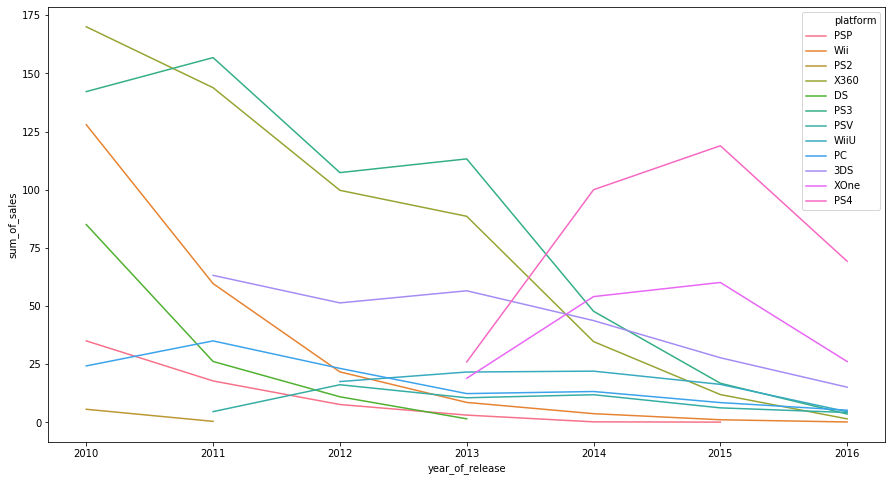

In [38]:
# too many platforms on the plot to draw conclusions, So i decide to limit the year range:
## only 2 platforms rise above their stating point: ps4 and xone
nn_data = n_data.query('year_of_release >= 2010')
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=nn_data, x='year_of_release', y='sum_of_sales', hue='platform')

In [39]:
# How long does it generally take for new platforms to appear and old ones to fade?
min_max_year= data.pivot_table(index='platform', values= 'year_of_release', aggfunc=['min','max']).reset_index()
min_max_year.columns=['platform', 'first_released','last_released']
min_max_year['plat_age'] = min_max_year['last_released'] - min_max_year['first_released'] +1
min_max_year.sort_values(by='last_released', ascending=False)

,platform,first_released,last_released,plat_age
30,XOne,2013.0,2016.0,4.0
2,3DS,2011.0,2016.0,6.0
28,X360,2005.0,2016.0,12.0
27,WiiU,2012.0,2016.0,5.0
26,Wii,2006.0,2016.0,11.0
20,PSV,2011.0,2016.0,6.0
13,PC,1985.0,2016.0,32.0
18,PS4,2013.0,2016.0,4.0
17,PS3,2006.0,2016.0,11.0
19,PSP,2004.0,2015.0,12.0


In [40]:
# Calculting mean and median age of platforms:
mean_age = min_max_year.plat_age.mean()
median_age = min_max_year.plat_age.median()
print("The mean age of a platform is: {}, and the median is:{}".format(mean_age, median_age))

The mean age of a platform is: 8.612903225806452, and the median is:7.0


***Short summary:***
The tables and plot show that a large amount of platforms have a similar life-cycle as does PS2 (shoot up in the first years, maintain a peak sale for a couple more, and then gradually decrease their sales to almost zero). Other platforms have difficulties raising their sales, and they stay at the bottom of sales until they ceases to exist.
The plot also shows that there are only 2 platforms for whome in 2016 the sum of sales is higher than when they entered the market: PS4 and XOne- both released at 2013.  
regarding the life cycle of the platforms- the age of the pltforms varies greatly. some last 32 years and counting, while others last a year. The mean age of a platform is 8.61, and the median is 7.0 (a right-tailed distribution of ages)

### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
I decided to stay with the platforms that are still selling in 2016, so i take the median age of platform lifecycle (7) and substract it from 2016 (=2009)).

In [41]:
new_data= data[data['year_of_release'] >= 2009]
new_data = new_data.query('sum_of_sales > 1')
new_data.describe(include='all')

# I am left with 12 platforms out of the 31 in the original dataset.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
count,681,681,681.000000,681,681.000000,681.000000,681.000000,681.000000,552.000000,575.000000,589,681.000000
unique,459,12,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,LEGO Star Wars III: The Clone Wars,PS3,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN
freq,5,169,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN,222,NaN
mean,NaN,NaN,2011.788546,NaN,1.341557,0.999427,0.253186,0.323157,80.088768,7.069043,NaN,2.917327
std,NaN,NaN,2.113525,NaN,1.603177,1.168556,0.671782,0.368259,9.866316,1.410197,NaN,3.136794
min,NaN,NaN,2009.000000,NaN,0.000000,0.000000,0.000000,0.000000,33.000000,2.100000,NaN,1.010000
25%,NaN,NaN,2010.000000,NaN,0.560000,0.400000,0.000000,0.130000,76.000000,6.300000,NaN,1.310000
50%,NaN,NaN,2011.000000,NaN,0.860000,0.620000,0.030000,0.210000,82.000000,7.400000,NaN,1.840000
75%,NaN,NaN,2014.000000,NaN,1.500000,1.090000,0.140000,0.360000,87.000000,8.100000,NaN,3.100000


### - Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [42]:
lead_plt = new_data.pivot_table(index='year_of_release', columns='platform', values='sum_of_sales', aggfunc='sum', fill_value=0)
lead_plt

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2009.0,0.00,53.67,9.09,7.68,83.76,0.00,10.26,0.00,130.68,0.00,77.11,0.00
2010.0,0.00,35.72,14.25,0.00,96.71,0.00,10.18,0.00,73.46,0.00,129.21,0.00
2011.0,40.71,6.41,14.27,0.00,107.98,0.00,0.00,1.54,30.88,0.00,103.43,0.00
2012.0,31.21,9.08,11.94,0.00,67.91,0.00,0.00,6.16,13.79,10.66,71.45,0.00
2013.0,43.36,0.00,4.45,0.00,83.61,22.74,0.00,0.00,7.33,12.32,70.35,14.55
2014.0,32.29,0.00,4.24,0.00,25.14,83.36,0.00,1.96,2.01,15.91,19.84,39.11
2015.0,15.03,0.00,2.45,0.00,4.39,92.38,0.00,0.00,0.00,10.53,3.27,46.01
2016.0,8.47,0.00,0.00,0.00,0.00,45.13,0.00,0.00,0.00,2.04,0.00,15.23


***Explaination and summary:***
- Looking at the life-cycle of the platforms, there are only 4 platforms that are still active (3DS, PS4, WiiU and XOne). Out of these platforms the 2 most profitable are PS4 ($45.13 mil.) and XOne ($15.23 mil.). As mentioned earlier in this project, however, the general sum of sales (not just for 2016) is still a bit lower than average for XOne, where as for PS4 it is around average.
- Also, it seems that all platforms are already beyond their peak sales, althogh for PS4 and XOne the peak was just last year (2015) and may still rise again. Also, 

-In terms of the rate in which sales dropped for these platforms: 
- *XOne* dropped about 66% of it's value in the past year, 
- *WiiU* dropped about 80%.
- *PS4* - about 50%
- *3DS*- also around 50%.


Since there are not too many platforms still "in the game" and a lot of gamers (compared to earlier years), it might be a good idea to invest in them.

### -  Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [43]:
game_bxplt = new_data.groupby(['platform', 'name'])['sum_of_sales'].sum().reset_index()
game_bxplt

,platform,name,sum_of_sales
0,3DS,Fire Emblem Fates,1.67
1,3DS,Animal Crossing: Happy Home Designer,3.05
2,3DS,Animal Crossing: New Leaf,9.17
3,3DS,Bravely Default: Flying Fairy,1.39
4,3DS,Donkey Kong Country Returns,1.90
...,...,...,...
676,XOne,The Witcher 3: Wild Hunt,1.30
677,XOne,Titanfall,2.95
678,XOne,Tom Clancy's Rainbow Six: Siege,1.34
679,XOne,Tom Clancy's The Division,2.17


In [44]:
# checking the number of games per platform (I wish i knew how to label the boxes in the boxplot with #of games)
game_per_plat = new_data.pivot_table(index='platform', values='name', aggfunc='count')
game_per_plat

,name
platform,
3DS,48
DS,40
PC,27
PS2,5
PS3,169
PS4,78
PSP,10
PSV,7
Wii,69


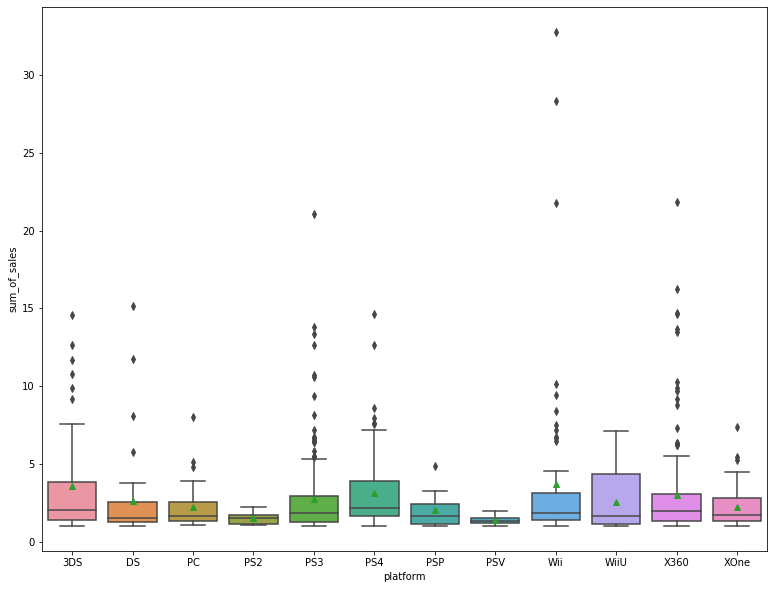

In [45]:
# boxplot with outliers:
plt.figure(figsize=(13, 10))
sns.boxplot(x='platform', y= 'sum_of_sales', data= game_bxplt, showmeans=True);

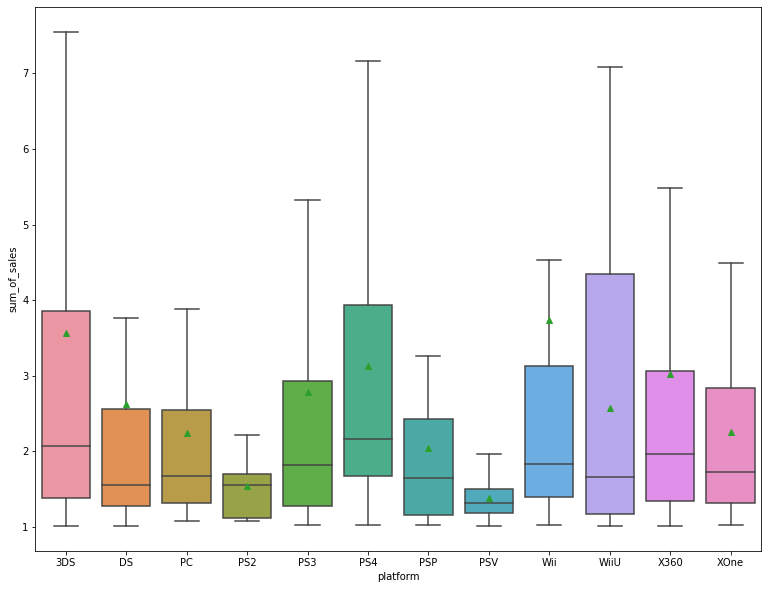

In [46]:
#boxplot without outliers:
plt.figure(figsize=(13, 10))
sns.boxplot(x='platform', y= 'sum_of_sales', data= game_bxplt, showmeans=True, showfliers=False);

***General remarks:***
- outliers may represent very successful games, in term of revenue, that affect the over-all mean profit for each platform.
- This may be seen in the big gaps shown in the boxplots between the lines representing the medians (located mostly in the same range of sales for all platforms), and the green triangle, representing the means (varying wildly across platforms).
- Looking at the 4 platforms still active in 2016:
-        it seems that the medians are very similar (a bit higher for PS4 and 3DS, and lower for WiiU and XOne).
-        Distrbution of sales is wider for PS4 and 3DS compared to WiiU and XOne.
-        The number of games per platform do not explain this difference. I guess specific games would.

### - 	Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions. 

In [47]:
# creating a function to explore the relation between different scores and the sum of sales:
def score_corr(platform, score_type):
    data= new_data[(new_data.platform==platform) & (new_data[score_type].notna())][['sum_of_sales', score_type]]
    sns.scatterplot(data=data, x=score_type, y='sum_of_sales', sizes=(20, 200));
    correlation = data.corr()
    print("A pearson's correlation test was conducted between {} and {}, for {} platform".format(score_type, 'sum_of_sales', platform))
    print("results showed the following:")
    print()
    print(correlation)
    print()
          

PS4 user_score
A pearson's correlation test was conducted between user_score and sum_of_sales, for PS4 platform
results showed the following:

              sum_of_sales  user_score
sum_of_sales      1.000000   -0.123617
user_score       -0.123617    1.000000

PS4 critic_score
A pearson's correlation test was conducted between critic_score and sum_of_sales, for PS4 platform
results showed the following:

              sum_of_sales  critic_score
sum_of_sales      1.000000      0.400709
critic_score      0.400709      1.000000

XOne user_score
A pearson's correlation test was conducted between user_score and sum_of_sales, for XOne platform
results showed the following:

              sum_of_sales  user_score
sum_of_sales      1.000000   -0.225932
user_score       -0.225932    1.000000

XOne critic_score
A pearson's correlation test was conducted between critic_score and sum_of_sales, for XOne platform
results showed the following:

              sum_of_sales  critic_score
sum_of_sales   

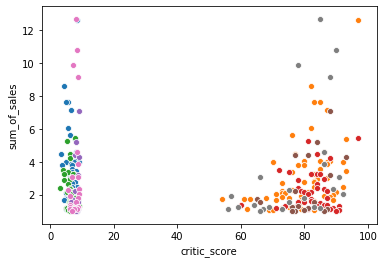

In [48]:
# applying the function to platforms: 
plat=['PS4', 'XOne', 'WiiU', '3DS']
col=['user_score', 'critic_score']

df=[]
for i in plat:
    for x in col:
        print(i, x)
        df.append([i, x, score_corr(i, x)])

***Summary of results:***
            user_score                |        critic_score
- PS4: very low negative corr         |   Medium sized positive corr
- XOne: low positive                  |   Very low negative
- WiiU: low positve                   |   Medium positive
- 3DS:  low positve                   |   Medium positive

- As can be seen: in general there is a stronger correlation between critic scores and sum of sales, than there is with user_score (platforms that got higher ratings by the critics, usually yielded higher sums of sales).
- Also, the general trend was a positive correlation for all platforms (the negatives were very weak and non significant).
- I addition, platforms were not equal in trends, and it would be wise to check before investing.

p.s. couldn't find where to add labels to the scatter plot... I assume the left condensed side illustrates the user score for all platforms, with weak correlations, while the right side of the plot represents the critic_scores for all platforms, with medium strength correlations.

### - 	Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [49]:
game_genre = new_data.pivot_table(index='genre', values=['sum_of_sales', 'name'], aggfunc={'sum_of_sales':'sum', 'name':'count'}).sort_values(by='sum_of_sales', ascending=False).reset_index()
game_genre.columns = ['genre', 'num_of_games', 'sum_of_sales']
game_genre

,genre,num_of_games,sum_of_sales
0,Action,186,470.61
1,Shooter,116,435.05
2,Sports,98,297.21
3,Role-Playing,79,237.60
4,Misc,48,159.73
5,Platform,40,129.62
6,Racing,36,93.89
7,Fighting,32,60.74
8,Simulation,17,49.90
9,Adventure,11,19.17


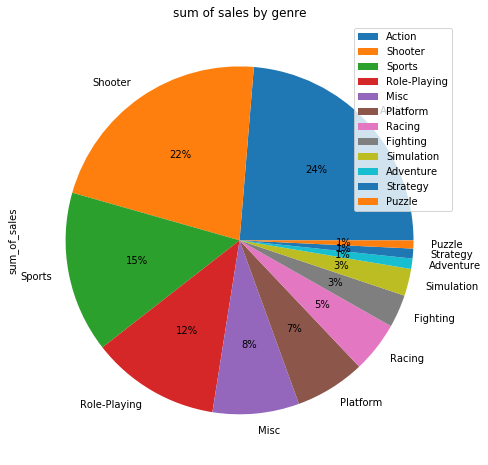

In [50]:
# Distribution of sales by genre:
game_genre.plot(y='sum_of_sales', kind='pie', figsize=(8,8), labels=game_genre['genre'], autopct='%1.0f%%', title= "sum of sales by genre");


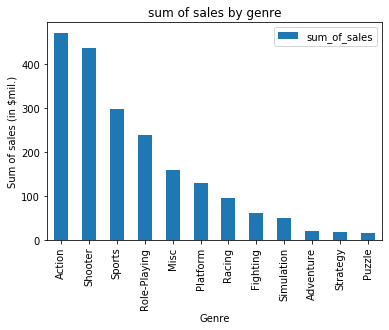

In [51]:
# The same distribution represented by a bar chart
ax = game_genre.plot(kind='bar', x='genre', y= 'sum_of_sales', title="sum of sales by genre");
ax.set(xlabel='Genre', ylabel='Sum of sales (in $mil.)');

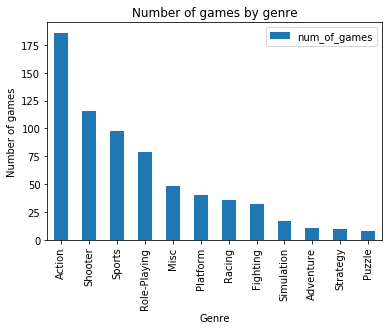

In [52]:
ax = game_genre.plot(kind='bar', x='genre', y= 'num_of_games', title="Number of games by genre");
ax.set(xlabel='Genre', ylabel='Number of games');

In [53]:
game_genre.sum_of_sales.mean()

165.55833333333337

In [54]:
# profit per game:
game_genre['ave_revenue_per_game'] = game_genre['sum_of_sales']/game_genre['num_of_games']
game_genre.sort_values(by='ave_revenue_per_game', ascending=False)

,genre,num_of_games,sum_of_sales,ave_revenue_per_game
1,Shooter,116,435.05,3.750431
4,Misc,48,159.73,3.327708
5,Platform,40,129.62,3.240500
2,Sports,98,297.21,3.032755
3,Role-Playing,79,237.60,3.007595
8,Simulation,17,49.90,2.935294
6,Racing,36,93.89,2.608056
0,Action,186,470.61,2.530161
7,Fighting,32,60.74,1.898125
11,Puzzle,8,14.97,1.871250


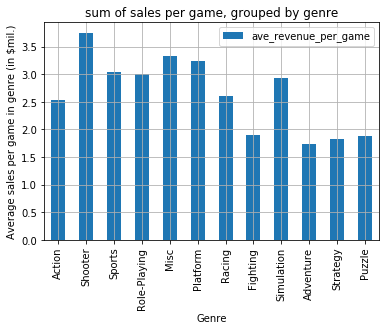

In [55]:
ax = game_genre.plot(kind='bar', x='genre', y= 'ave_revenue_per_game', title="sum of sales per game, grouped by genre", grid=True);
ax.set(xlabel='Genre', ylabel='Average sales per game in genre (in $mil.)');

#### Summary: 
Exploring the distribution shows that:
- 4 genres earn above the average in sales: Action, Shooter, Sports and Role playing.
- These 4 are incharge of 73% of all the gaming market sales.
- The two first ones ( Action & Shooter) are incharge of a little less than half of all sales in the gaming market (46%).
- These 4 genres also release the highest number of games, in the same order of their success in sales (Action, Shooter, Sports and Role playing), howere- the number of games in the Action genre seems significantly higher than the rest, out of proportion compared with their sales. 
- A further exploration, trying to estimate the revenue per game in eacg genre shows that, indeed, although Action genre has the highest sales, they are attributed to the high number of games. So, actually, revenue per-game in the Action category is not so high.. #8 out of 12. The highest revenues per-game are in the Shooter, Misc, Platform, Sports and Role-playing (in this order).   


## 4- Create a user profile for each region

In [56]:
NA = data.query('na_sales> 0')
NA

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.00,0.00,48.0,NaN,E,0.01
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [57]:
EU = data.query('eu_sales> 0')
EU

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16690,Pony Friends 2,PC,2009.0,Simulation,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,NaN,0.01


In [58]:
JP= data.query('jp_sales> 0')
JP

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


### - For each region (NA, EU, JP), determine:
#### The top five platforms. Describe variations in their market shares from region to region.

In [59]:
# because the number of rows in each region df is very different, as is the number of games per platform, i decided to compare the mean revenue per game in each platform:
top_na = NA.groupby(['platform'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False).head()
top_na

,platform,na_sales
4,GB,2.525333
7,GEN,1.751818
9,NES,1.679200
19,SNES,1.423953
18,SCD,1.000000


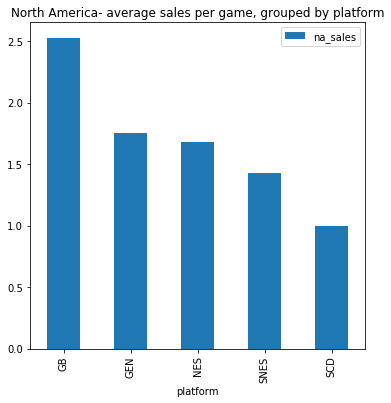

In [60]:
top_na.plot(y='na_sales', x='platform', kind='bar', figsize=(6,6), title= "North America- average sales per game, grouped by platform");


In [61]:
top_eu = EU.groupby(['platform'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False).head()
top_eu

,platform,eu_sales
4,GB,1.055778
7,GEN,0.501818
19,SNES,0.488205
14,PS4,0.486517
18,SCD,0.360000


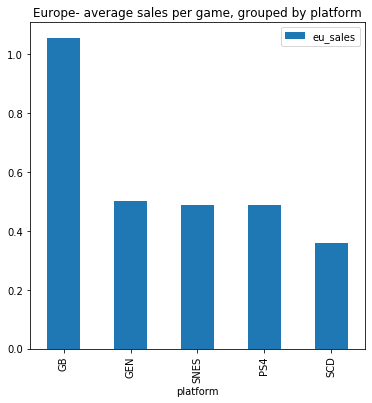

In [62]:
top_eu.plot(y='eu_sales', x='platform', kind='bar', figsize=(6,6), title= "Europe- average sales per game, grouped by platform");


In [63]:
top_jp = JP.groupby(['platform'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False).head()
top_jp

,platform,jp_sales
10,NES,1.027604
4,GB,0.877526
22,SNES,0.495957
9,N64,0.355368
14,PS,0.348579


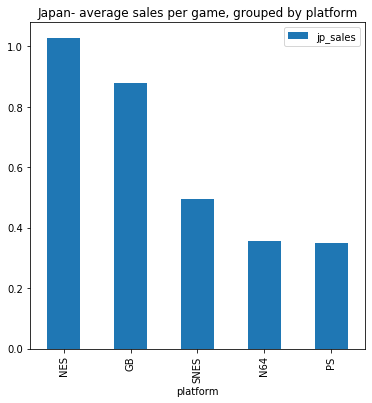

In [64]:
top_jp.plot(y='jp_sales', x='platform', kind='bar', figsize=(6,6), title= "Japan- average sales per game, grouped by platform");


In [65]:
na1 = top_na.mean()
na2 = top_na.median()
print ("NA- mean sales {}, median is {}". format(na1, na2))

NA- mean sales na_sales    1.676061
dtype: float64, median is na_sales    1.6792
dtype: float64


In [66]:
eu1 = top_eu.mean()
eu2 = top_eu.median()
print ("EU- mean sales {}, median is {}". format(eu1, eu2))

EU- mean sales eu_sales    0.578464
dtype: float64, median is eu_sales    0.488205
dtype: float64


In [67]:
jp1 = top_jp.mean()
jp2 = top_jp.median()
print ("JP- mean sales {}, median is {}". format(jp1, jp2))

JP- mean sales jp_sales    0.621007
dtype: float64, median is jp_sales    0.495957
dtype: float64


***Summary:***
In order to compare the sales between regions, i created 3 DF, one for each region, by applying the criterion of sales > 0.
I noticed that the sizes of the regional DFs are very different: NA had 11995 rows, EU had 10678  rows, and JP had 6144 rows (almost half of the data included in NA).
Hence, when comparing revenues, i decided not to simply sum up the sales for each region, but use the average sale instead. A simple summation would have allowed me to only consider each platform's ranking WITHIN each region, but not BETWEEN regions. 
A average measure takes into account the number of games and data volume, and might be more accurate.
This way, we can explore the average revenue per game, grouped by platform, and compare regions.
Results show:
- In general, the average revenue per game tends to be the highest in NA (mean-$1.68 mil),compared with JP ($0.62 mil.), and  EU  ($0.58 mil).
- Users in the three regions shared their love to some game platform (GB,SNES platforms appeared in the top 5 of all regions). Other platforms varried between regions:
-  - In NA the top selling platform was GB, with a significant gap from the 3 other high ones: GEN, NES, SNES, and SCD the lowest out of the 5.
-  - In EU the top selling platform was GB, with a significant gap from all the rest (GEN, SNES,  PS4 and SCD last again).
-  - In JP the top selling platform was NES, with small gap from the second best-GB. In a sig gap from them, were 3 other best sellers that did not all apear in the top5 list of the other regions: SNES, N64 and PS closing the list).

#### 	The top five genres. Explain the difference.

In [68]:
na_top_gnr = NA.groupby(['genre'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False).head()
na_top_gnr

,genre,na_sales
4,Platform,0.556942
8,Shooter,0.513459
7,Role-Playing,0.380669
2,Fighting,0.375656
10,Sports,0.367579


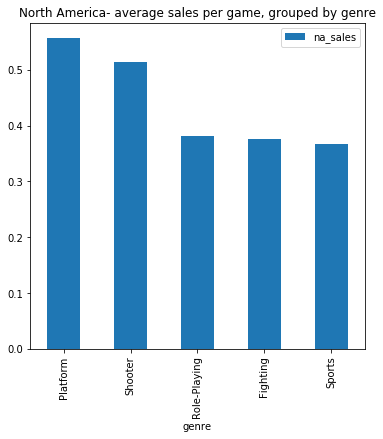

In [69]:
na_top_gnr.plot(y='na_sales', x='genre', kind='bar', figsize=(6,6), title= "North America- average sales per game, grouped by genre");

In [70]:
eu_top_gnr = EU.groupby(['genre'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_top_gnr

,genre,eu_sales
8,Shooter,0.294219
4,Platform,0.276931
7,Role-Playing,0.242890
10,Sports,0.241909
6,Racing,0.233789


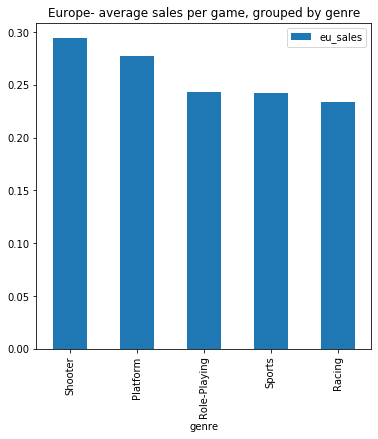

In [71]:
eu_top_gnr.plot(y='eu_sales', x='genre', kind='bar', figsize=(6,6), title= "Europe- average sales per game, grouped by genre");

In [72]:
jp_top_gnr = JP.groupby(['genre'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_top_gnr

,genre,jp_sales
4,Platform,0.475309
5,Puzzle,0.368052
7,Role-Playing,0.337204
6,Racing,0.250575
9,Simulation,0.238352


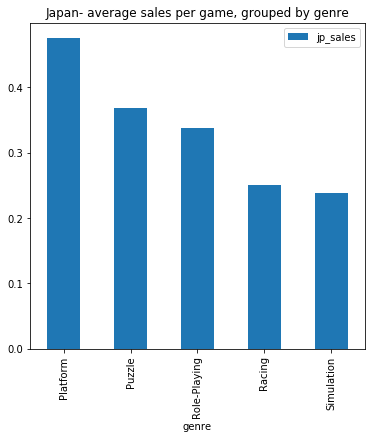

In [73]:
jp_top_gnr.plot(y='jp_sales', x='genre', kind='bar', figsize=(6,6), title= "Japan- average sales per game, grouped by genre");

In [74]:
m1=na_top_gnr.mean()
m2=eu_top_gnr.mean()
m3=jp_top_gnr.mean()
std1=na_top_gnr.std()
std2=eu_top_gnr.std()
std3=jp_top_gnr.std()

print("NA sales:", m1, std1, "EU sales:", m2, std2, "JP sales:", m3, std3)

NA sales: na_sales    0.438861
dtype: float64 na_sales    0.089401
dtype: float64 EU sales: eu_sales    0.257947
dtype: float64 eu_sales    0.02619
dtype: float64 JP sales: jp_sales    0.333899
dtype: float64 jp_sales    0.096496
dtype: float64


***Summary:***
-- Comparison between regions regarding the top selling genres followed the same logic as in the comparison between platforms (we used the average sales per game per genre, and not a sum measure).
- Results showed:
- - Average sales per game tended to be higher in the NA region (mean= 0.44, std=0.09), than in JP (mean= 0.33, std=0.1) and in EU (mean= 0.26, std=0.03).
- - Users in the three regions shared their love to some game genres (Platform and Role-playing genres appeared in the top 5 of all regions). Other genre types varried between regions:
- - Na and EU users enjoyed best the Platform and Shooting genres, with Role-playing genre in the 3rd place, a bit further down in ranking. In the JP region, however, the Shooting genre did not apear in the top 5 genres. JP users enjoyed best the Platform,Puzzle and Role-plying genres.
- - NA and EU shared their love to the Sports genre, and Eu and JP both appreciated the Racing genre.
- - JP users were unique in choosing Puzzle and Simulation genres in their top 5. NA users wer unique in their choice of Fighting games in their top 5.

#### Do ESRB ratings affect sales in individual regions?

In [75]:
# Dropping rows with NaNs in rating columns:
NA.dropna(subset=['rating'], inplace=True)
EU.dropna(subset=['rating'], inplace=True)
JP.dropna(subset=['rating'], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys

In [76]:
# According to wikipedia, K-A rating is an old rating type, that was replaced with E.
NA['rating'] = NA['rating'].replace('K-A', 'E')
EU['rating'] = EU['rating'].replace('K-A', 'E')
JP['rating'] = JP['rating'].replace('K-A', 'E')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [77]:
na_rate= NA.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales', ascending=False).head()
na_rate

,rating,na_sales
0,AO,1.260000
4,M,0.531775
1,E,0.345174
5,T,0.287871
2,E10+,0.264751


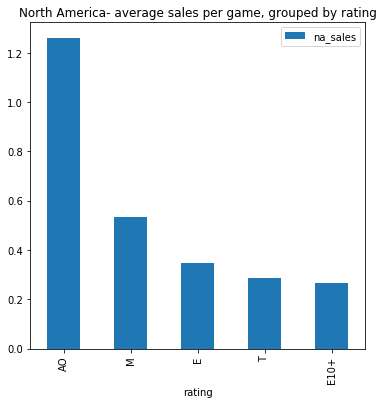

In [78]:
na_rate.plot(y='na_sales', x='rating', kind='bar', figsize=(6,6), title= "North America- average sales per game, grouped by rating");

In [79]:
eu_rate= EU.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_rate

,rating,eu_sales
0,AO,0.610000
4,M,0.334495
1,E,0.249341
2,E10+,0.178183
6,T,0.175966


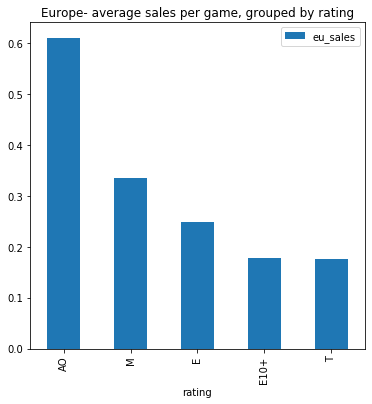

In [80]:
eu_rate.plot(y='eu_sales', x='rating', kind='bar', figsize=(6,6), title= "Europe- average sales per game, grouped by rating");

In [81]:
jp_rate= JP.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales', ascending=False)
jp_rate

,rating,jp_sales
0,E,0.350475
3,T,0.179405
1,E10+,0.171064
2,M,0.116875


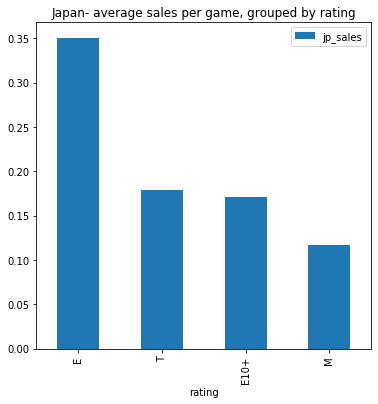

In [82]:
jp_rate.plot(y='jp_sales', x='rating', kind='bar', figsize=(6,6), title= "Japan- average sales per game, grouped by rating");

***Summary:***
 A difference exists between JP and the other two regions, in respect to the relations between rating and sales:
 - For NA and EU users, sales seemed significantly higher for games marked as AO (adults only) compared with sales of games rated as M, E, T, E10. 
 - For JP users, sales seem significantly higher for games marked as E (Evertone: 6+) than for the rest of the ratings (T, E10+, M). There were no sales for #1 rating category in NA and EU (AO).
 - I am not sure how to explain these results: perhaps there is a cultural effect here, and Japan users, being a more family oriented society, buy more games that suit the whole family. Maybe it is considered not socialy acceptable to buy games that are for adults only.

## 5- Testing hypothses:

### 1.
####  H0: Average user ratings of the Xbox One and PC platforms are the same.
####    H1: Average user ratings of the Xbox One and PC platforms are different.

In [83]:
data.platform.value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [84]:
# Subsetting data to two samples: 
xbox=data[(data.platform=='XOne') & (data.user_score.notna())]['user_score'].astype(float)
xbox

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [85]:
xbox.unique()

array([7.9, 5.4, 6.4, 6.2, 4.1, 5.5, 7.5, 4.4, 7.2, 4.3, 3.1, 6.1, 8.2,
       7.4, 5.9, 6.9, 6.6, 6.3, 6.8, 5.8, 7.3, 8. , 9.2, 7.8, 8.4, 5.1,
       5.2, 7.7, 5.6, 5.7, 7. , 6.7, 4.6, 8.1, 6. , 7.1, 3.2, 8.6, 8.5,
       5.3, 4. , 8.3, 3. , 8.7, 2.1, 7.6, 4.9, 8.9, 1.6, 4.2, 8.8])

In [86]:
pc=data[(data.platform=='PC') & (data.user_score.notna())]['user_score'].astype(float)
pc

85       7.6
138      7.3
192      4.0
218      8.2
284      9.1
        ... 
16681    8.1
16692    7.6
16696    5.8
16702    7.2
16705    5.8
Name: user_score, Length: 755, dtype: float64

In [87]:
pc.unique()

array([7.6, 7.3, 4. , 8.2, 9.1, 7.9, 8.1, 8. , 7.8, 3.9, 6.6, 5.9, 7.5,
       9. , 8.3, 5.6, 8.6, 4.8, 2.5, 5.3, 8.7, 4.2, 7. , 2.2, 6. , 5.4,
       8.4, 8.5, 6.7, 6.9, 8.9, 5.5, 6.2, 5.7, 8.8, 7.4, 6.8, 9.3, 6.1,
       6.5, 7.7, 4.5, 3.6, 3. , 6.4, 5.8, 4.7, 4.6, 5.2, 2.1, 6.3, 3.7,
       5. , 3.5, 3.3, 7.1, 4.4, 3.2, 4.3, 7.2, 4.9, 3.8, 4.1, 2.9, 5.1,
       3.4, 2.8, 3.1, 9.2, 1.4, 2.4])

In [88]:
# Since there is a big difference in sample sizes, i decide to subsample the bigger PC one, to adjust sizes:
pc = pc.sample(n=182)
pc

2238     8.2
12440    6.8
13296    8.0
1737     5.3
14568    8.1
        ... 
11487    5.4
9433     7.3
14856    7.6
15496    5.4
455      7.8
Name: user_score, Length: 182, dtype: float64

In [89]:
# checking the equal variance assumption:
st.levene(xbox, pc, center = 'mean')
# According to the result- equal variance assumption is not rejected

LeveneResult(statistic=0.014707931068027428, pvalue=0.9035395123071421)

In [90]:
# independent t-test with equal_var = True:
alpha = 0.05
result1 = st.ttest_ind(xbox, pc, equal_var = True)
print ('t-test score:', result1.statistic, 'p-value:', result1.pvalue)
if result1.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
print('XOne mean:', xbox.mean(), 'XOne std:', xbox.std())
print('PC mean:', pc.mean(), 'PC std.:', pc.std())

t-test score: -5.127461646824048 p-value: 4.793505182712991e-07
We reject the null hypothesis
XOne mean: 6.521428571428572 XOne std: 1.380940564592144
PC mean: 7.261538461538461 PC std.: 1.3729243886556812


***Hypothesis 1- summary of results:***
- Our null hypothesis was that Xbox One and PC platforms have on average the same user-ratings. We wanted to test the alternative hypothesis that the two platforms differ in their average user-score.
- Since the two samples had a big size difference (XOne: n=182, PC: n=755), I decided to take a random sample from PC of the same size as XOne, and compare the means using an independent sample t-test.
- First, i tested the assumption of equal variance, using the Levenes test. Results showed that there isn't a significant difference between variances of the two samples. Hence, i ran the independant sample t-test under the assumption of equal variances. 
- I chose to use the conventional threshold of 5% (alpha= 0.05) as a probability risk measure.
- T-test Result showed that the average user score was significantly higher for PC platform (mean=7.03, std= 1.53)
  compared to the XOne platform (meam=6.52, std= 1.38)

### 2. 
####  H0: Average user ratings for the Action and Sports genres are different.
####   H1: Average user ratings for the Action and Sports genres are different.

In [91]:
data.genre.value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [92]:
action=data[(data.genre=='Action') & (data.user_score.notna())]['user_score'].astype(float)
action

16       8.2
17       9.0
23       8.1
24       8.7
38       8.5
        ... 
16652    8.5
16654    5.1
16660    6.7
16663    2.4
16692    7.6
Name: user_score, Length: 1796, dtype: float64

In [93]:
sports=data[(data.genre=='Sports') & (data.user_score.notna())]['user_score'].astype(float)
sports

0        8.0
3        8.0
13       7.7
15       7.4
77       4.3
        ... 
16450    4.5
16518    1.4
16528    6.9
16546    9.5
16643    6.6
Name: user_score, Length: 1081, dtype: float64

In [94]:
sports.unique()

array([8. , 7.7, 7.4, 4.3, 5. , 5.7, 9.2, 7.9, 8.2, 7.5, 8.9, 4.5, 4.2,
       7.8, 8.7, 6.7, 9.1, 7.6, 8.5, 4.4, 5.9, 6.5, 6.3, 7.2, 9. , 6.8,
       5.8, 6.1, 8.6, 3.2, 5.5, 8.1, 7. , 4.9, 5.4, 6.4, 8.8, 6.2, 6.9,
       5.6, 5.2, 7.1, 4.1, 6. , 8.4, 8.3, 3. , 2.9, 2.7, 3.5, 2. , 5.1,
       7.3, 6.6, 5.3, 4.6, 3.1, 3.3, 4. , 3.6, 2.1, 3.8, 4.8, 2.4, 2.8,
       1.8, 1.7, 3.9, 1.6, 1.1, 3.7, 9.5, 4.7, 1.5, 3.4, 0.7, 9.4, 0.2,
       1.4, 9.3, 1.9])

In [95]:
action.unique()

array([8.2, 9. , 8.1, 8.7, 8.5, 8.3, 7.9, 7.5, 6.6, 7.6, 8.8, 6.9, 9.4,
       9.1, 9.2, 8.9, 8.6, 6.7, 6.1, 8. , 5.4, 7.7, 8.4, 9.3, 7.2, 6.3,
       4.9, 7.8, 6.8, 4.1, 7.4, 7. , 5.6, 6.4, 6.5, 4.5, 5.1, 7.3, 5.7,
       3.5, 7.1, 4.2, 5.8, 4.8, 6. , 6.2, 5. , 5.5, 5.9, 5.2, 2.8, 4.3,
       5.3, 1.6, 4.6, 3.4, 3. , 3.7, 4.7, 4. , 3.6, 4.4, 3.9, 3.2, 3.8,
       3.3, 0.3, 1.7, 2.9, 1.2, 2.5, 2.3, 2. , 3.1, 9.5, 1.5, 2.2, 2.4])

In [96]:
# Taking a random sample from the 'action' sample, to have similar sized samples and increase the test's statistical power:
action = action.sample(n=1081)
action

2923     7.6
14602    5.8
2190     8.4
817      8.9
10620    7.5
        ... 
12764    5.6
6427     8.5
10157    5.6
14727    6.2
11144    6.3
Name: user_score, Length: 1081, dtype: float64

In [97]:
# checking the equal variance assumption: 
st.levene(action, sports, center = 'mean')
# According to the result- equal variance assumption is rejected

LeveneResult(statistic=18.954777462840227, pvalue=1.4010289801880244e-05)

In [98]:
# independent t-test with equal_var = False:
alpha = 0.05
result2 = st.ttest_ind(action, sports, equal_var = False)
print ('t-test score:', result2.statistic, 'p-value:', result2.pvalue)
if result2.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
print('Action mean:', action.mean(), 'Action std:', action.std())
print('Sports mean:', sports.mean(), 'Sports std.:', sports.std())

t-test score: 2.2974036474772372 p-value: 0.02169284073102502
We reject the null hypothesis
Action mean: 7.101295097132285 Action std: 1.4059325977153143
Sports mean: 6.951433857539316 Sports std.: 1.6195850741839009


***Hypothesis 2- summary of results:***
- Our null hypothesis was that the Action genre and the Sports genre have on average the same user-ratings. We wanted to test the alternative hypothesis that the two genres differ on their average user-score.
- Since the two samples had a size difference (Action: n=1796, Sports: n=1081), I decided to take a random sample from PC of the same size as XOne, and compare the means using an independent sample t-test.
- First, i tested the assumption of equal variance, using the Levenes test. Results showed that there was a significant difference between variances of the two samples. Hence, i ran the independant sample t-test under the assumption of non-equal variances. 
- I chose to use the conventional threshold of 5% (alpha= 0.05) as a probability risk measure.
- T-test Result showed that we cannot reject the null hypothesis: The average user score was not significantly higher for the Action genre (mean=7.07, std= 1.45)
  than for the Sports genre (meam=6.95, std= 1.62).

## 6- Conclusions




## General conclusions:

This project was ordered by an online store Ice, which sells video games all over the world. The purpose of the analysis was to advise the 2017 advertising campaigns as to potential big winners by identifying patterns that determine whether a game succeeds or not.
The data analyzed was taken from available open sources, with data between 1980 and 2016. Data included info regarding:
Game names, platforms, years of release, genre, sales in million USD dollars (grouped by region: North-America, Europe, Japan and Other). Data also included info about games' ESRB ratings as well as user scoring and critic scoring.

The hypotheses that guided this study regarded a potential difference between the average user scorings of different platforms (Xbox One compared with PC), and also ddifferent genres (Action compared with sports).

The analysis included a few stages:
 - ***Preprocessing***:
- Data includtd 16715 rows and 11 columns, with 11559 game names, 31 plattforms, 12 genres, and 8 Rating levels.
- Missing values: appear in 6 variables: 
     - name and genre (2 values in the same rows) >> Dropped
     - year of release: 1.6% of total data >>  Dropped
     - critic_score: 51.3% of data >> sub-setted out in relevant analyses.
     - user_score*: 40.08% of data  >>  sub-setted out in relevant analyses.
     - rating: 40.47%  >> sub-setted out in relevant analyses.
- Problematic data: user_score* had 14.5% 'tbd's values (to be determined). These values appeared across a wide range of years, but not the most recent year of 2016. I concluded that they were probably due to data that wasn't up to date, and decided to turn them into NaNs. This has raised the rate of missing values in the user score to 45.41%.
  
 - ***Exploratory data analysis***: A few adjustments have been made to the data in order to fit our needs: data types of some of the variables were changed and assistive variables and DFs were created.
- preliminary observations regarding the descriptive statistics showed that there are significantly more sales in North America compared to the two other regions: almost twice as many sales in North America, compared with Europe, and more than 3 times as many sales compared to Japan.

- ***Data analysis results:***
-  In general, the growth of the number of games released each year, between 1980 and 2016, builds up in "waves" or "peaks", and does not advance linearly. In years where the growth is very fast, in the following years the market "corrects" itself downwards in the number of new games released. Despite these "correction", the general trend between 1980 and 2008 was a positive one. 
- From 2008 on, though, there is a general fall in the number of games that come out to the market. Right now, 2016 has the lowest number of released games since 2001. This might be a sign of an upcoming rise in the number of games (especially if a world-wide pandemic is on it's way... ;-))

- The analyses focused on two pivot variables and their possible effect on sales: games' platform and games' genre. Hence, presentation of results would be according to these two variables.

   - **1- Games' Platform:**
- In regard to total sum of sales:
    -  - Platforms vary significantly in their total number of sales, ranging between $1233.56 mil. and $0.03 mil.
    -  - the sum of sales of the majority of platforms is slightly below average (up to 1 std.), Whereas 5 platforms' sales 
        rose way above average (1.5 std and more): PS2, X360, PS3, Wii, and DS (all of these platforms are no longer selling).
    -  - The life cycle of most of these top selling platforms is as followed: a very high rise in its first couple of years, a
        general ability to maintain its peak sales for up to 2 years, and then- a gradual fall in revenue until reaching ~ 0.
        The platforms' ages vary greatly: some last 32 years and counting, while others last a year. The mean age of a
        platformis 8.61, and the median is 7.0.
 -  - ***In 2016*** - only 4 platforms are still active (3DS, PS4, WiiU and XOne). Only 2 platforms still have sales
        exceeding their sales' starting point in 2013 PS4 ($45.13 𝑚𝑖𝑙.) and XOne($15.23 mil.).
    -  - all platforms are already beyond their peak sales, but for PS4 and XOne the peak was just last year (2015) and may
         still rise for a short time.
    -  - In terms of the rate in which sales dropped for these platforms:
        •	XOne dropped about 66% of its value in the past year.
        •	WiiU dropped about 80%.
        •	PS4 - about 50%
        •	3DS- also around 50%.
     - -  The number of games per platform do not explain the sum of sales, however specific seccessful games do seem to affect
          the mean sales. 
- ** The relation between sales and scoring: For 3DS, PS4 and WiiU platforms a medium sized positive correlation was found between **critic scores** and sum of sales. A weak correlation was found between the user scores and sales for all 4 plats.

  
- In regard to region:
    - In general, the average revenue per game in each platform was highest in NA (mean-$1.68 𝑚𝑖𝑙) ,compared with Japan ($0.62 mil.), and Europe ($0.58 mil).
    - In all 3 regions sales of ***GB***, and ***SNES*** platforms appeared in the top 5 selling platforms. 
    - Other platforms varried between regions:
        - In NA and EU there was a big gap in sales between the leading plat (GB) and the rest: GEN, NES (for NA), PS4 (for
           EU), SNES, and SCD
        - In JP the top selling platform was NES, with small gap from the second best-GB. In a sig gap from them, were 3 other
           best sellers: SNES, N64 and PS closing the list.
           

***2-  Games' Genre:***
- In regard to total sum of sales:
      - 4 genres earn above the average in sales: Action, Shooter, Sports and Role playing.
      - These 4 are incharge of 73% of all the gaming market sales.
      - Action and Shooter genres are incharge of a little less than half of all sales in the gaming market (46%).
      - These 4 genres also release the highest number of games, in the same order of their success in sales (Action, Shooter, 
        Sports and Role playing). 
      - Estimation of the average revenue per game in each genre showed that the Action genre's highest sales are attributed to
        the high number of games: The revenue per-game in the Action category is not so high.. #8 out of 12. The highes 
        revenues per-game are in the Shooter, Misc, Platform, Sports and Role-playing (in this order).

- In regard to region:
    - Average sales per game in each genre were higher in the NA region (mean= 0.44, std=0.09), than in JP (mean= 0.33,
        std=0.1) and in EU (mean= 0.26, std=0.03).
    - In all 3 regions ***Platform*** and ***Role-playing*** genres appeared in the top 5 best sellers. 
    - Other genre types varried between regions:
        - In Na and EU sales were highest for Platform and Shooting genres, with Role-playing genre in the 3rd place, a bit
        further down in ranking. Sports genre was also among the top 5 for NA and EU users.
        - In JP, however, the Shooting genre did not apear in the top 5 genres. JP sales were highest for Platform, Puzzle
            and Role-plying genres.
        - Racing was in the top 5 for JP and EU users.
        - JP users were unique in choosing Puzzle and Simulation genres in their top 5. NA users wer unique in their choice of
           Fighting games in their top 5.
           
- The relations between rating and sales split by region:
 A difference exists between JP and the other two regions, in respect to the relations between rating and sales:
     - For NA and EU users, sales seemed significantly higher for games marked as **AO** (adults only) compared with sales of games rated as M, E, T, E10. 
     - For JP users, sales seem significantly higher for games marked as **E** (Evertone: 6+) than for the rest of the ratings
       (T, E10+, M). There were no sales for #1 rating category in NA and EU (AO).
     - This might be the result of cultural factors.



 - ***Testing hypothese***:
- *Hypothesis 1-*
- Our null hypothesis was that Xbox One and PC platforms have on average the same user-ratings. I wanted to test the alternative hypothesis that the two platforms differ in their average user-score.
- Since the two samples had a big size difference (XOne: n=182, PC: n=755), I took a random sample from PC of the same size as XOne, and compare the means using an independent sample t-test.
- An independant sample t-test under the assumption of equal variances was run, with alpha=0.05 
- *Result* showed that the average user score was significantly higher for PC platform (mean=7.03, std= 1.53)
  compared to the XOne platform (meam=6.52, std= 1.38)


*Hypothesis 2-*
- Our null hypothesis was that the Action genre and the Sports genre have on average the same user-ratings. We wanted to test the alternative hypothesis that the two genres differ on their average user-score.
- Since the two samples had a size difference (Action: n=1796, Sports: n=1081), I took a random sample from PC of the same size as XOne, and compare the means using an independent sample t-test.
- An independant sample t-test under the assumption of non-equal variances was run, with pvalue<0.05. 
- *Result* showed that The average user score was not significantly higher for the Action genre (mean=7.07, std= 1.45)
  than for the Sports genre (meam=6.95, std= 1.62).
 
*** Conclusions***

- In planning the future 2017 advertising campaigns I would suggest to:
- 1- There are not too many platforms still "in the game" and a lot of gamers (compared to earlier years). Out of the 3DS, PS4, WiiU and XOne platforms, i would suggest to invest in PS4 and XOne.
- 2- For PS4, I would invest specifically in games with higher critic scores.
- 3 Regarding genre, results show that the best genres to invest in are Platform and Role-playing.
- 3- ***However*** - The region may be considered a moderator variable , influencing the choice of paltform and genre, as well as the way in which the rating affects sales.This variable should be taken into account when deciding what games to promote where. Specifically, it seems that the Japanees game market does not behave the same way as the North American and European markets.
